**Step 1: Data Preparation**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load and Read the dataset
df = pd.read_csv("Aviation_KPIs_Dataset.csv")

In [3]:
# Display the first few rows
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


**Step 2: Data Cleaning**

In [4]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Flight Number                     200000 non-null  object 
 1   Scheduled Departure Time          200000 non-null  object 
 2   Actual Departure Time             200000 non-null  object 
 3   Delay (Minutes)                   200000 non-null  int64  
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 5   Turnaround Time (Minutes)         200000 non-null  int64  
 6   Load Factor (%)                   200000 non-null  float64
 7   Fleet Availability (%)            200000 non-null  float64
 8   Maintenance Downtime (Hours)      200000 non-null  float64
 9   Fuel Efficiency (ASK)             200000 non-null  float64
 10  Revenue (USD)                     200000 non-null  float64
 11  Operating Cost (USD)              200000 non-null  f

In [5]:
# Check for missing values
df.isnull().sum()

,0
Flight Number,0
Scheduled Departure Time,0
Actual Departure Time,0
Delay (Minutes),0
Aircraft Utilization (Hours/Day),0
Turnaround Time (Minutes),0
Load Factor (%),0
Fleet Availability (%),0
Maintenance Downtime (Hours),0
Fuel Efficiency (ASK),0


In [6]:
# Summary statistics
df.describe()

,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
count,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,59.35885,12.003438,74.451680,74.997178,85.001378,5.503103,3.496959,25571.448338,20429.003323,15.011169,2550.025537,1.752445,7818.578193,6245.613443,5142.445015
std,34.67602,2.311966,25.977826,14.439393,8.672413,2.601257,0.865309,14158.512116,11316.410641,5.778340,1414.291993,0.720194,4947.028923,3957.358310,18123.595784
min,0.00000,8.000000,30.000000,50.000000,70.000000,1.000000,2.000000,1000.060000,800.030000,5.000000,100.020000,0.500000,203.110000,164.830000,-38973.960000
25%,29.00000,9.990000,52.000000,62.500000,77.480000,3.250000,2.750000,13297.042500,10609.022500,10.010000,1325.570000,1.130000,3812.782500,3041.547500,-7983.690000
50%,59.00000,12.010000,74.000000,74.960000,85.000000,5.500000,3.490000,25566.300000,20410.885000,15.000000,2544.210000,1.750000,7315.460000,5834.705000,5216.975000
75%,89.00000,14.010000,97.000000,87.530000,92.530000,7.760000,4.250000,37860.402500,30245.907500,20.010000,3776.387500,2.370000,10909.272500,8715.670000,18269.647500
max,119.00000,16.000000,119.000000,100.000000,100.000000,10.000000,5.000000,49999.950000,39999.840000,25.000000,5000.000000,3.000000,24999.340000,19928.340000,49054.690000


In [7]:
# Check for duplicate rows
df.duplicated().sum()

0

**Step 3:Feature** **Engineering**

In [8]:
# Convert Date Columns
# Convert Scheduled Departure Time and Actual Departure Time to datetime format.
# It allows easy extraction of useful features like month, day, hour, and delay duration.

df['Scheduled Departure Time'] = pd.to_datetime(df['Scheduled Departure Time'])
df['Actual Departure Time'] = pd.to_datetime(df['Actual Departure Time'])

In [9]:
# Extract New Features

# Scheduled Month: Identifies seasonal trends.
df['Scheduled Month'] = df['Scheduled Departure Time'].dt.month

# Scheduled Day: Captures specific day effects.
df['Scheduled Day'] = df['Scheduled Departure Time'].dt.day

# Scheduled Hour: Helps understand time-of-day impacts.
df['Scheduled Hour'] = df['Scheduled Departure Time'].dt.hour

# Delay Duration (Hours): Converts delay minutes to hours for uniformity.
df['Delay Duration (Hours)'] = df['Delay (Minutes)'] / 60

In [10]:
# Drop Irrelevant Columns
# Columns like Flight Number and raw date columns are not useful for prediction.

df.drop(columns=["Flight Number", "Scheduled Departure Time", "Actual Departure Time"], inplace = True)

**Step 4: Data Visualization**


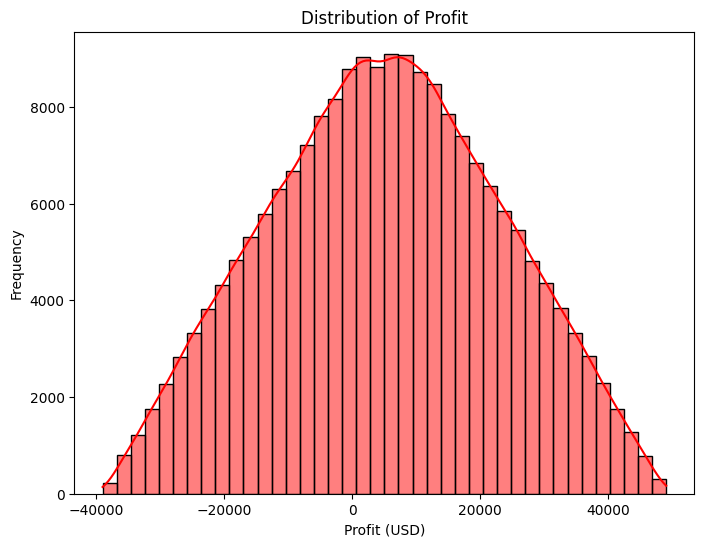

In [11]:
# Visualize Target Variable: Profit (USD)
# Understand the distribution of the target variable.
# Detect outliers or skewness using a histogram.

plt.figure(figsize=(8,6))
sns.histplot(df['Profit (USD)'], bins=40, kde=True, color='red')
plt.title('Distribution of Profit')
plt.xlabel('Profit (USD)')
plt.ylabel('Frequency')
plt.show()

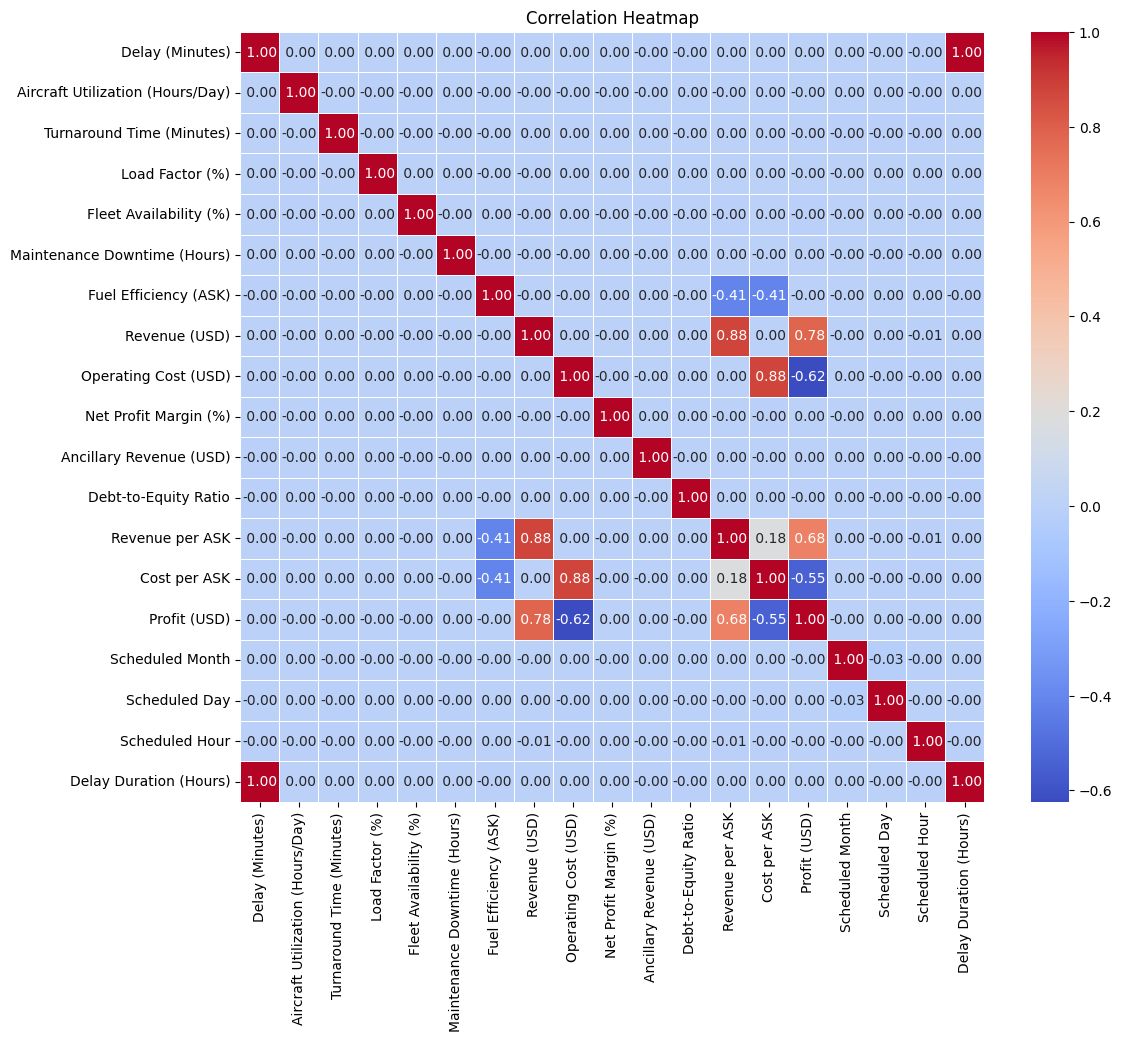

In [12]:
# Correlation Heatmap
# Identify relationships between features and the target variable.
# Helps in feature selection.

plt.figure(figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=' .2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Step 5: Data Preprocessing**

In [13]:
# Handling Outliers
# Outliers can distort model training.
# Apply techniques like clipping or removing extreme values.

# Remove extreme outliers from Profit (USD)
df = df[(df['Profit (USD)'] > -50000) & (df['Profit (USD)'] < 50000)]


In [14]:
# We need to train an ML model to predict airline profitability based on key operational and financial factors.
# Feature Selection
# Select the most relevant features based on the correlation analysis.
# Separate features (X) and target variable (y).

X = df.drop(columns=['Profit (USD)'])
y = df['Profit (USD)']

In [15]:
# Split the data into training and testing sets to evaluate the model’s performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 6: Model Building**

In [16]:
#Train a Machine Learning Model
# Model Selection: Random Forest Regressor
# Good for handling non-linear relationships and feature importance.
model = RandomForestRegressor(random_state=42)
print(model)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)


RandomForestRegressor(random_state=42)

**Step 7: Model Evaluation**

In [17]:
#We need to check model accuracy before using it for real-world predictions.
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}')

MAE: 40.61, MSE: 2774.16, R²: 1.00


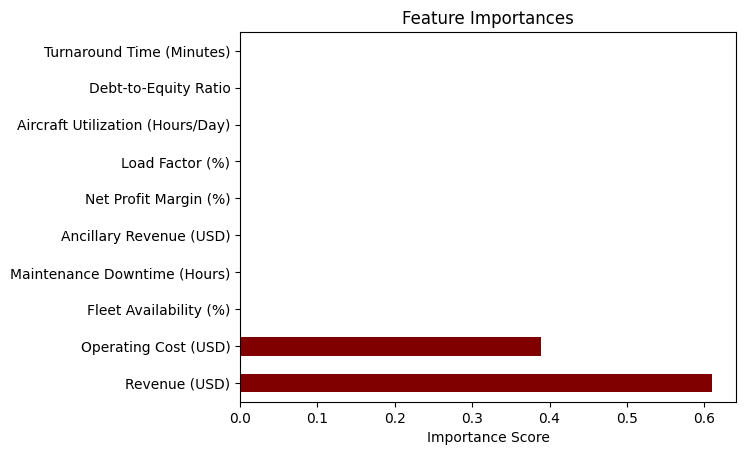

In [18]:
# Identify which features contribute the most to profit prediction.
# Plot feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='Maroon')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.show()


# 🛠 Step 8: Additional Enhancements (Advanced Features & Optimization)

## 🔹 8.1 Feature Engineering Enhancements
Feature engineering improves model performance by adding meaningful insights. We created new features that impact **airline profitability** directly:  
✅ **Profit Margin (%)** → Helps analyze profit as a percentage of revenue.  
✅ **Efficiency Ratio** → `(Revenue / Operating Costs)` – Measures how efficiently the airline utilizes its resources.  
✅ **RASK & CASK** → Revenue and Cost per Available Seat Kilometer, key metrics for profitability.  

## 🔹 8.2 Hyperparameter Tuning
Optimizing model parameters to achieve **better accuracy**:  
✅ **GridSearchCV / RandomizedSearchCV** – Methods to find the best hyperparameters for the model.  
✅ **XGBoost / LightGBM** – Advanced boosting algorithms that provide **faster and more accurate** predictions.  

## 🔹 8.3 Model Deployment (Optional)
To make the model usable in real-world applications:  
✅ **Streamlit / Flask** – Build a simple web application where users input flight details to predict profit.  
✅ **Pickle Model** – Save and load the trained model to make quick predictions.  
